In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import folium
from IPython.display import HTML

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
!move "D:\DIAMOND\Downloads\독수리\TimeGender.csv"

지정된 파일을 찾을 수 없습니다.


In [3]:
!move "D:\DIAMOND\Downloads\Region.csv"

지정된 파일을 찾을 수 없습니다.


In [4]:
df = pd.read_csv('file-path/data/TimeGender.csv')
df.shape

(242, 5)

In [5]:
df_male = df[df['sex']=='male']

In [6]:
df_female = df[df['sex']=='female']

In [7]:
df_female

,date,time,sex,confirmed,deceased
1,2020-03-02,0,female,2621,9
3,2020-03-03,0,female,3002,12
5,2020-03-04,0,female,3332,12
7,2020-03-05,0,female,3617,14
9,2020-03-06,0,female,3939,17
...,...,...,...,...,...
233,2020-06-26,0,female,7218,131
235,2020-06-27,0,female,7241,131
237,2020-06-28,0,female,7265,131
239,2020-06-29,0,female,7287,131


In [8]:
df_female = df_female.reset_index(drop=True)
df_male = df_male.reset_index(drop=True)

In [9]:
df_female['date']=df_female['date'].str.replace(pat=r'[^A-Za-z0-9]', repl=r'', regex=True)
df_male['date']=df_male['date'].str.replace(pat=r'[^A-Za-z0-9]', repl=r'', regex=True)


In [10]:
df_male['date']=df_male['date'].astype(int)
df_female['date']=df_female['date'].astype(int)

In [11]:
df_male.loc[df_male['date']<20200400,'date']=202003
df_male.loc[(df_male['date']>=20200400) & (df_male['date']<20200500),'date']=202004
df_male.loc[(df_male['date']>=20200500) & (df_male['date']<20200600),'date']=202005
df_male.loc[(df_male['date']>=20200600) & (df_male['date']<20200700),'date']=202006

In [12]:
df_female.loc[df_female['date']<20200400,'date']=202003
df_female.loc[(df_female['date']>=20200400) & (df_female['date']<20200500),'date']=202004
df_female.loc[(df_female['date']>=20200500) & (df_female['date']<20200600),'date']=202005
df_female.loc[(df_female['date']>=20200600) & (df_female['date']<20200700),'date']=202006

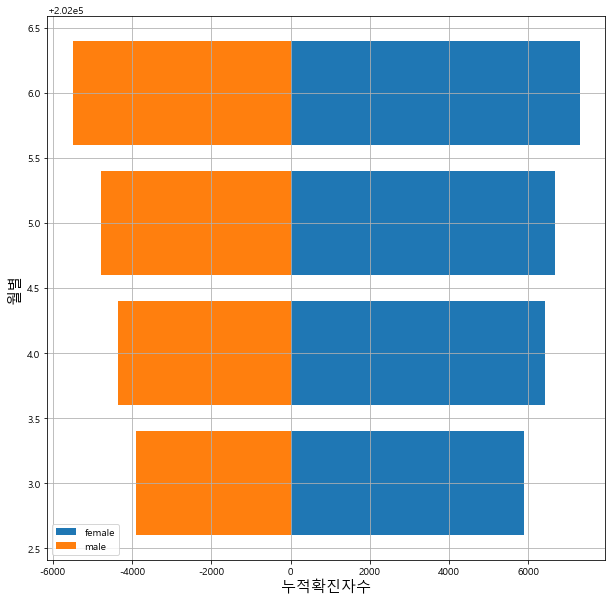

In [13]:
plt.figure(figsize=(10,10))
plt.barh(df_female['date'],df_female['confirmed'],label='female')
plt.barh(df_female['date'],-df_male['confirmed'],label='male')
xlabel=plt.xlabel('누적확진자수',fontsize=15)
ylabel=plt.ylabel('월별',fontsize=15)
legend=plt.legend(fontsize=10)
plt.grid(True)

In [14]:
df_male['date'].unique()

array([202003, 202004, 202005, 202006])

In [15]:
df_region = pd.read_csv('file-path/data/Region.csv')

In [16]:
df_region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [17]:
df_region['province'].value_counts()

Gyeonggi-do          32
Seoul                26
Gyeongsangbuk-do     24
Jeollanam-do         23
Gangwon-do           19
Gyeongsangnam-do     19
Busan                17
Chungcheongnam-do    16
Jeollabuk-do         15
Chungcheongbuk-do    12
Incheon              11
Daegu                 9
Gwangju               6
Ulsan                 6
Daejeon               6
Korea                 1
Jeju-do               1
Sejong                1
Name: province, dtype: int64

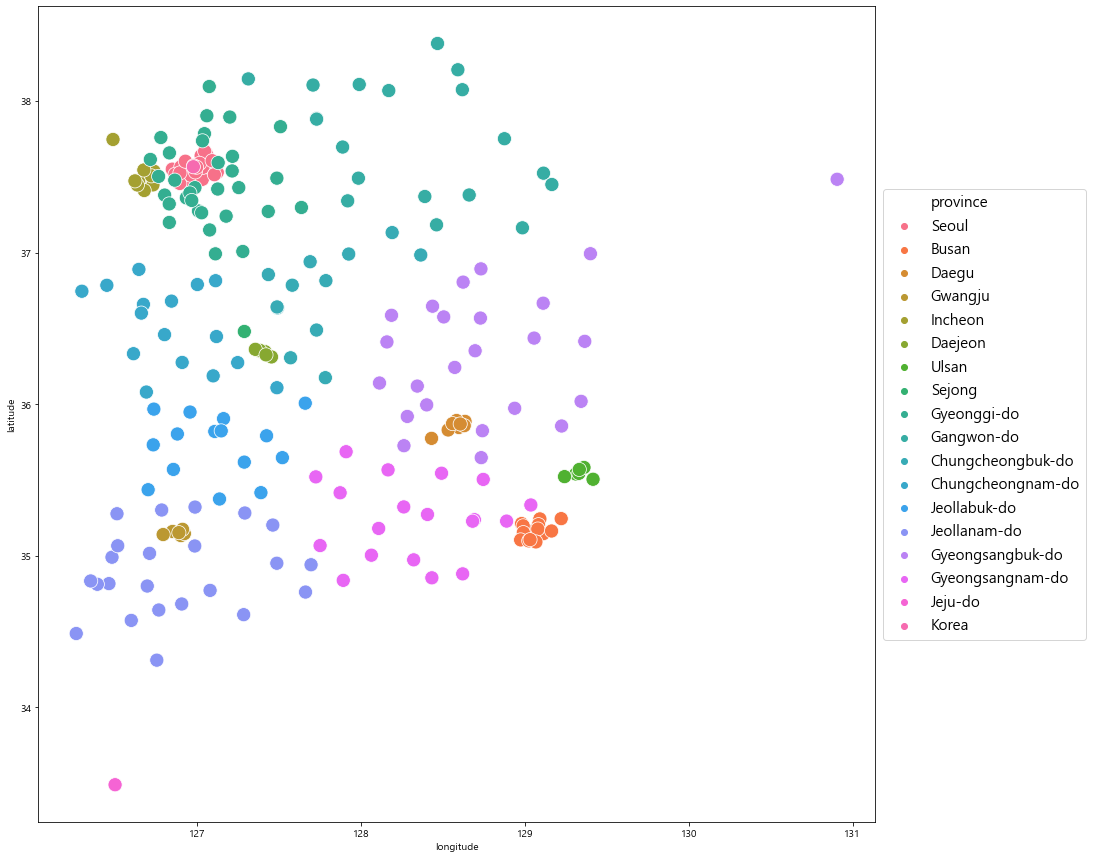

In [18]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_region,x='longitude',y='latitude',hue='province',s=200)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

In [31]:
a=df_region['longitude'].mean()
b=df_region['latitude'].mean()

In [40]:
map = folium.Map(location=[b,a], zoom_start=6)

In [41]:
pl1=df_region['province'].unique().tolist()
color1=['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue','darkpurple', 'white', 'pink', 'lightblue', 'lightgreen','gray', 'black']

In [42]:
for i in range(len(df_region)):
    location=[df_region['latitude'][i],df_region['longitude'][i]]
    popup=df_region['city'][i]    
    for j in range(len(pl1)):
        if df_region['province'][i]==pl1[j]:
            color=color1[j]
    folium.Marker(
        location=location,
        popup = popup,
        icon=folium.Icon(color = color)
    ).add_to(map)

In [43]:
map